# Title: WES_237A_lab4_report
# PID: A69028485
# Name: William Wei
# GitHub username: William Lien Chin Wei
# Email (registered with GitHub): williams19834812@gmail.com

In [1]:
import time
from pynq.overlays.base import BaseOverlay
import socket

base = BaseOverlay("base.bit")
btns = base.btns_gpio
leds = base.leds

# Sockets

This notebook has both a client and a server functionality. One PYNQ board in the group will be the client and SENDS the message. Another PYNQ board will be the server and RECEIVES the message.

## Server

Here, we'll build the server code to $\textbf{LISTEN}$ for a message from a specific PYNQ board.


When we send/receive messages, we need to pieces of information which will tell us where to send the information. First, we need the IP address of our friend. Second, we need to chose a port to listen on. For an analogy, Alice expects her friend, Bob, to deliver a package to our back door. With this information, ALICE (server ip address) can wait at the BACK DOOR (port) for BOB (client ip address) to deliver the package.

Format of the information
 ipv4 address: ###.###.###.### (no need for leading zeros if the number is less than three digits)
 port: ##### (it could be 4 or 5 digits long, but must be >1024)
 
Use the socket documentation (Section 18.1.3) to find the appropriate functions https://python.readthedocs.io/en/latest/library/socket.html


In [2]:
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# 1: Bind the socket to the pynq board <CLIENT-IP> at port <LISTENING-PORT>
sock.bind(('0.0.0.0', 4321))
# 2: Accept connections
sock.listen()
# 3: Receive bytes from the connection
#conn is a new socket object usable to send and receive 
#data on the connection, and address is the address bound 
#to the socket on the other end of the connection.
conn, addr = sock.accept()
# 4: Print the received message
print('Connected by', addr)
data = conn.recv(1024)
print('Received', repr(data))

Connected by ('192.168.2.1', 44492)
Received b'Test from client, laptop\n'


<font color='blue'>$\textbf{Here, the PYNQ work as the server, the laptop work as a client using nc.}$</font>
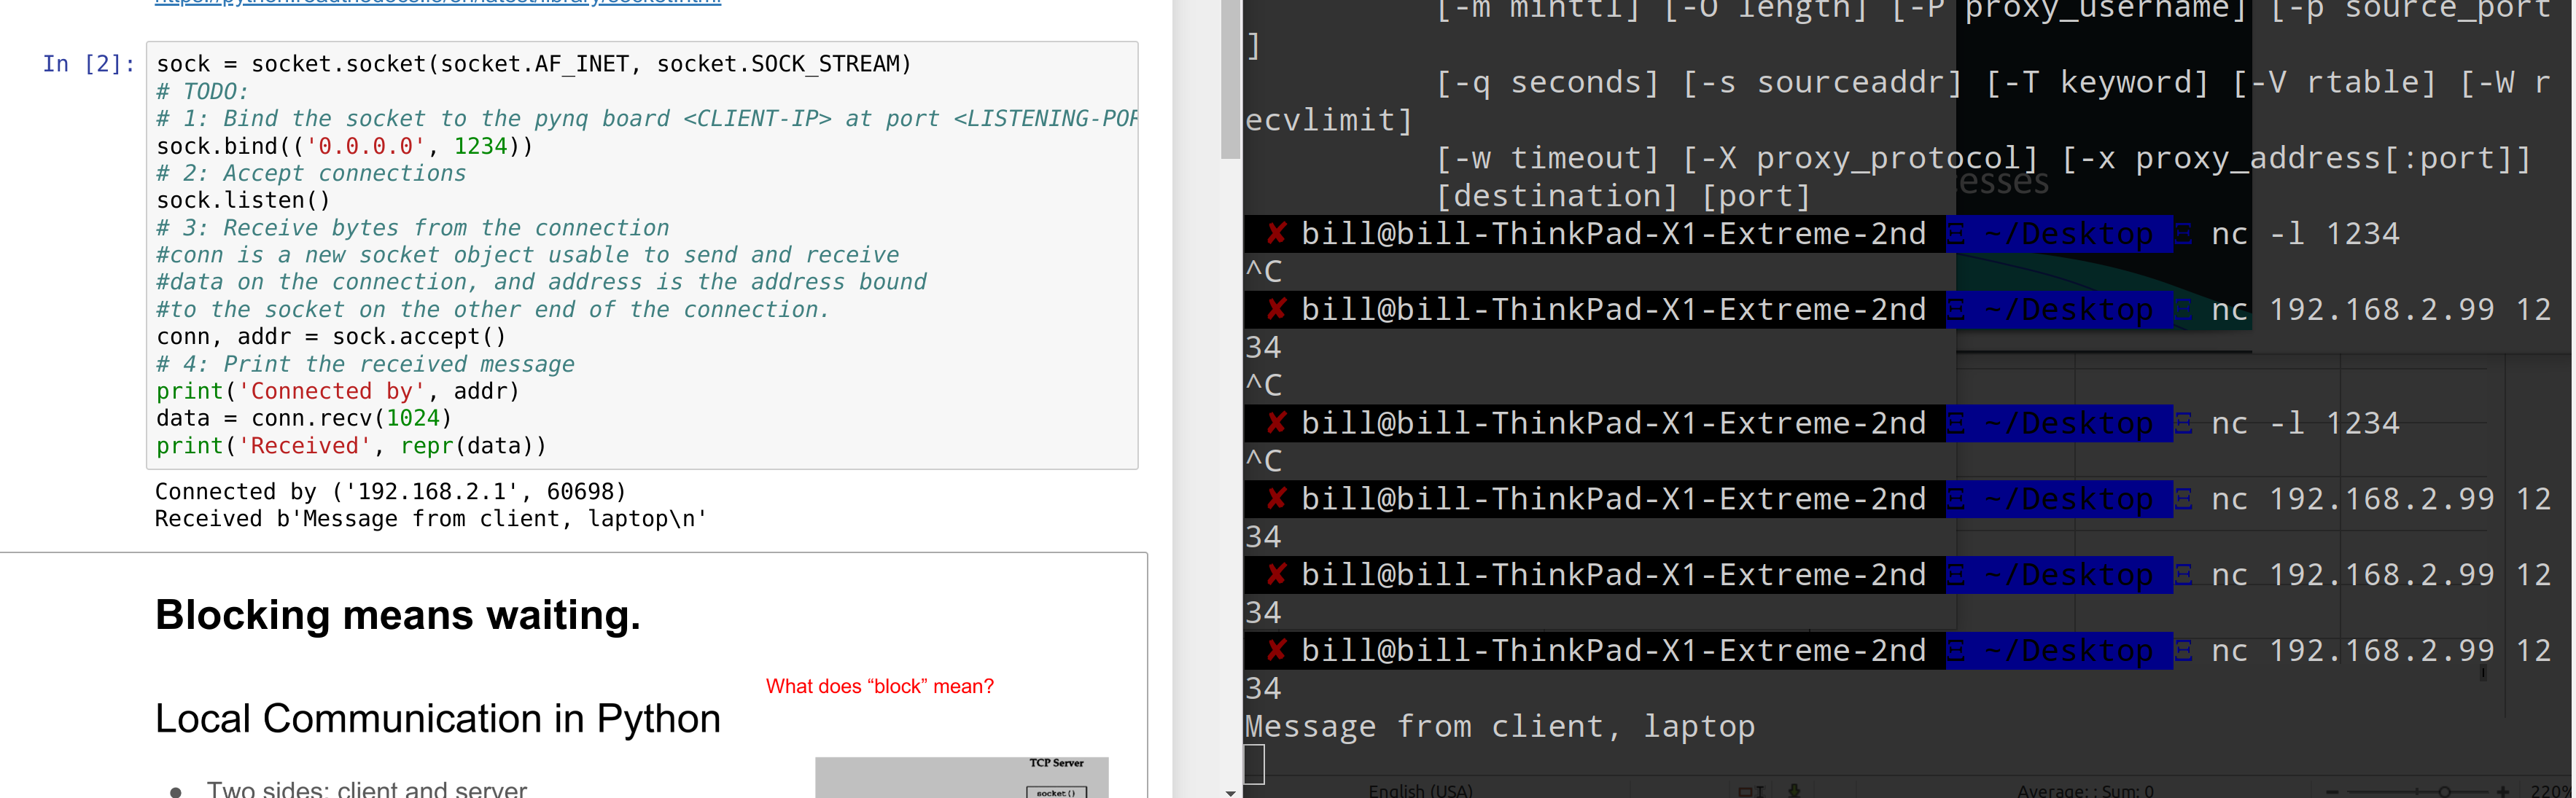

<font color='blue'>$\textbf{Here, the PYNQ work as the server, the laptop works as a client using a python code.}$</font>
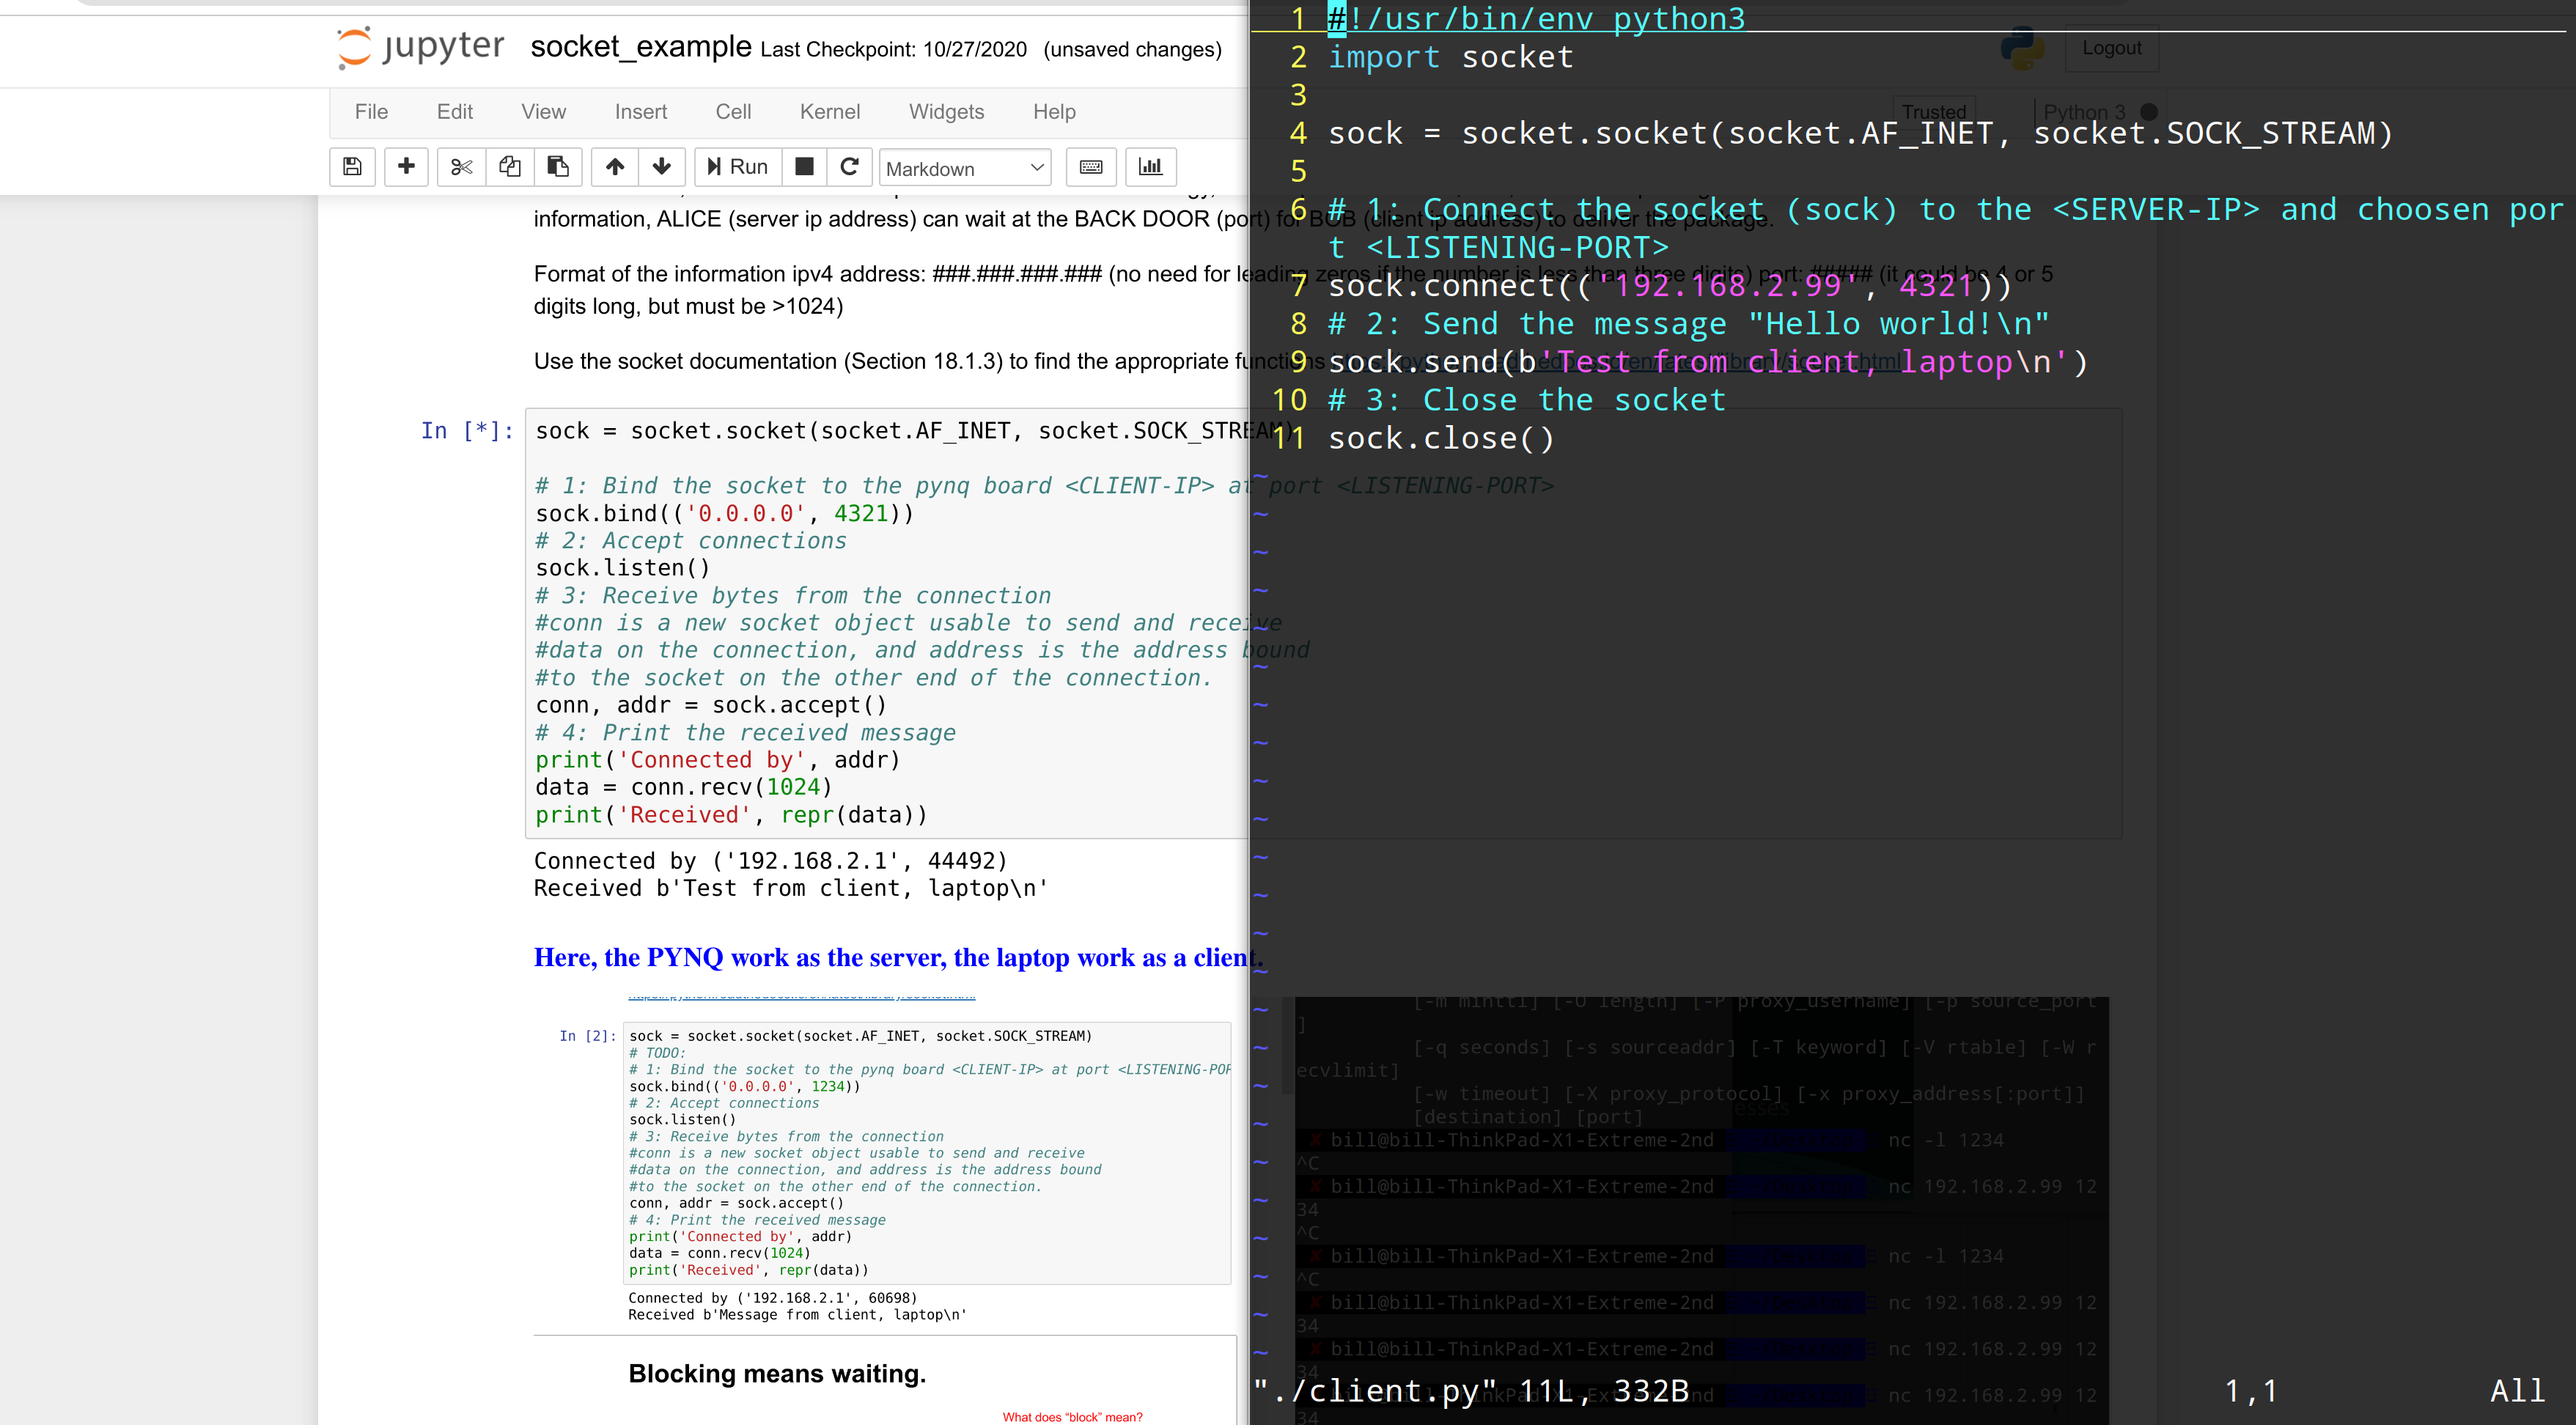

## Client

Now, we can implement the $\textbf{CLIENT}$ code. 

Back to the analogy, now we're interested in delivering a package to our friend's back door. This means BOB (client ip address) is delivering a package to ALICE (server ip address) at her BACK DOOR (port)

**Remember to start the server before running the client code**

In [2]:
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
 
# 1: Connect the socket (sock) to the <SERVER-IP> and choosen port <LISTENING-PORT>
sock.connect(('192.168.2.1', 1234))
# 2: Send the message "Hello world!\n"
sock.send(b'Hello, world\n')
# 3: Close the socket
sock.close()

<font color='blue'>$\textbf{Here, the PYNQ work as the client, the laptop work as a server using a python code}$</font>
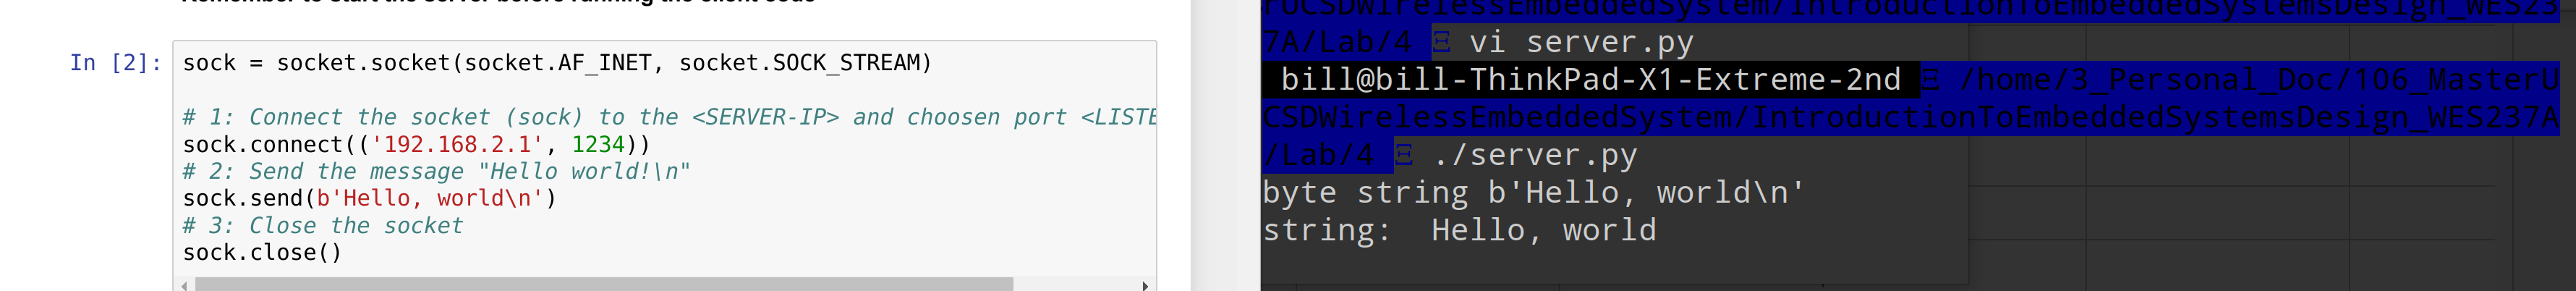

<font color='blue'>$\textbf{Here, the PYNQ work as the client, the laptop work as a server using nc}$</font>
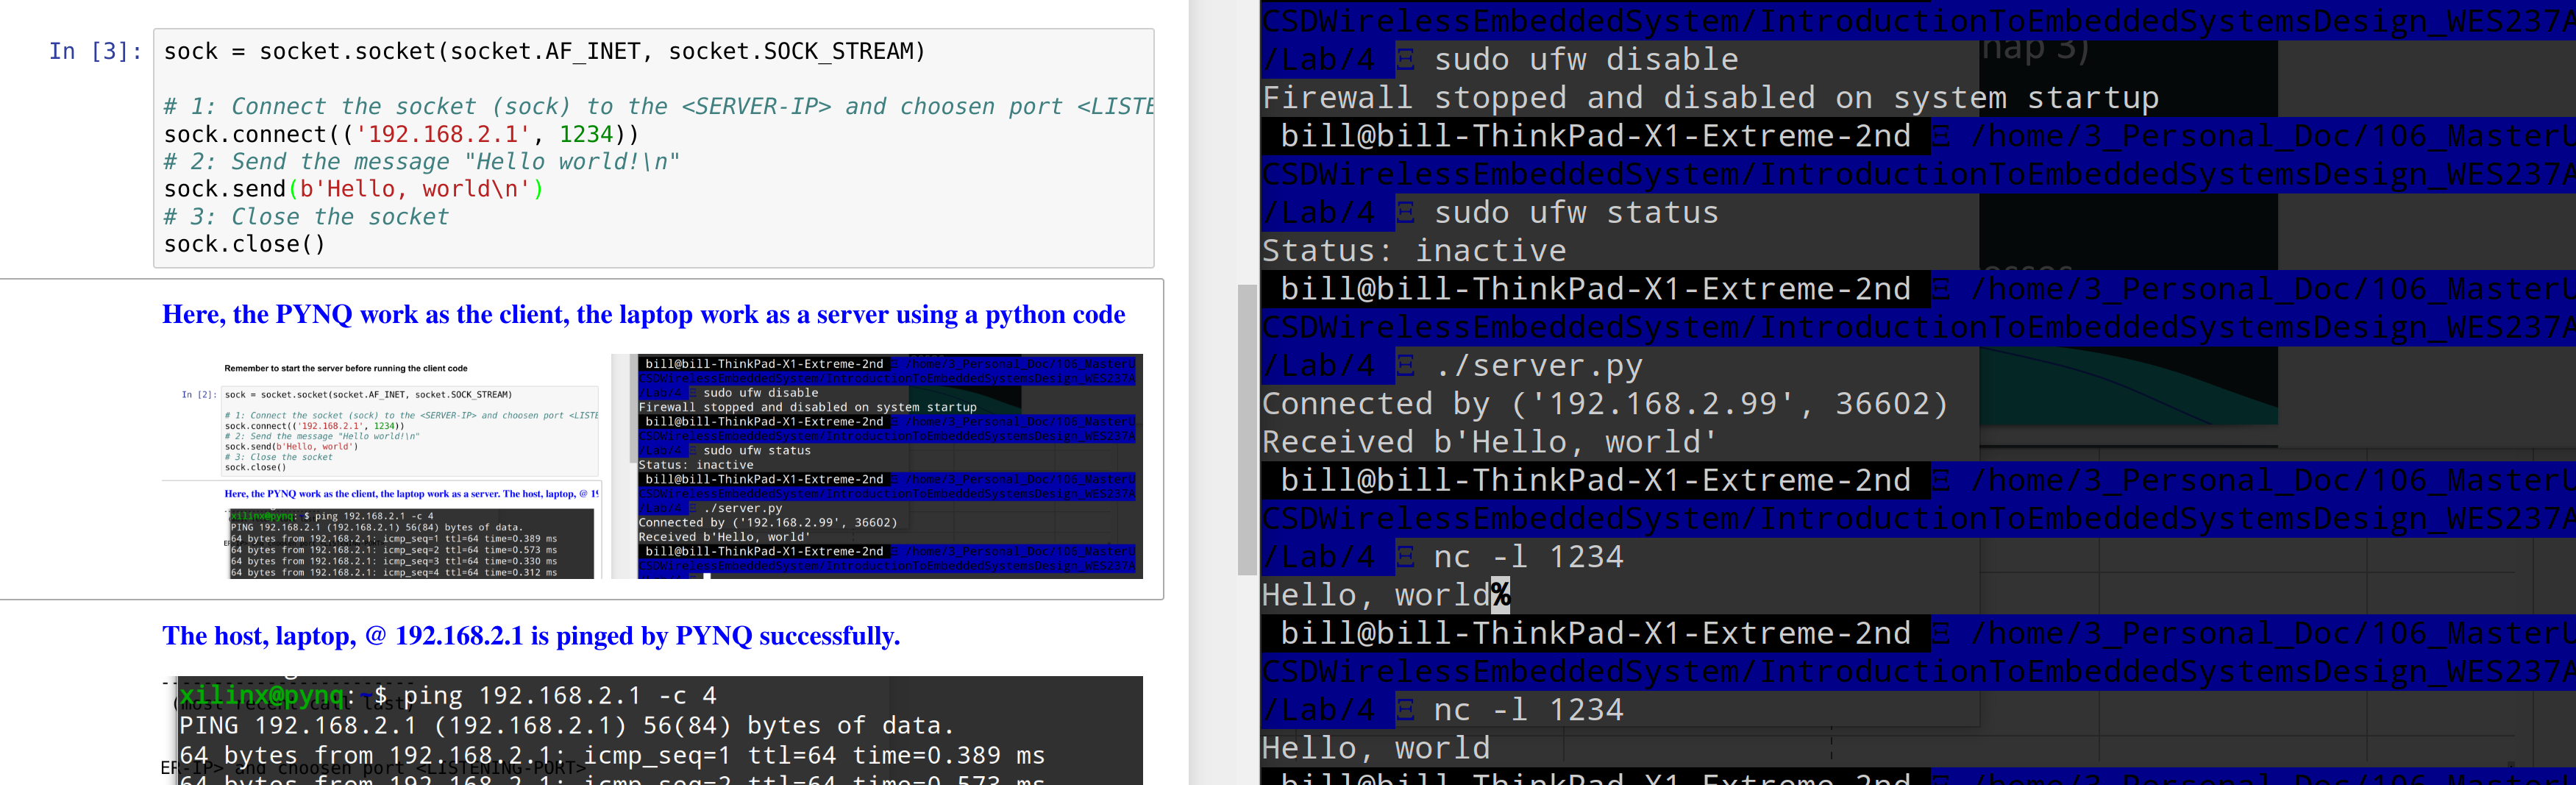

<font color='red'>$\textbf{The firewall on my laptop, server end, was disabled so that the PYNQ can connect as a client. Otherwise, a timeout error occurred}$</font>
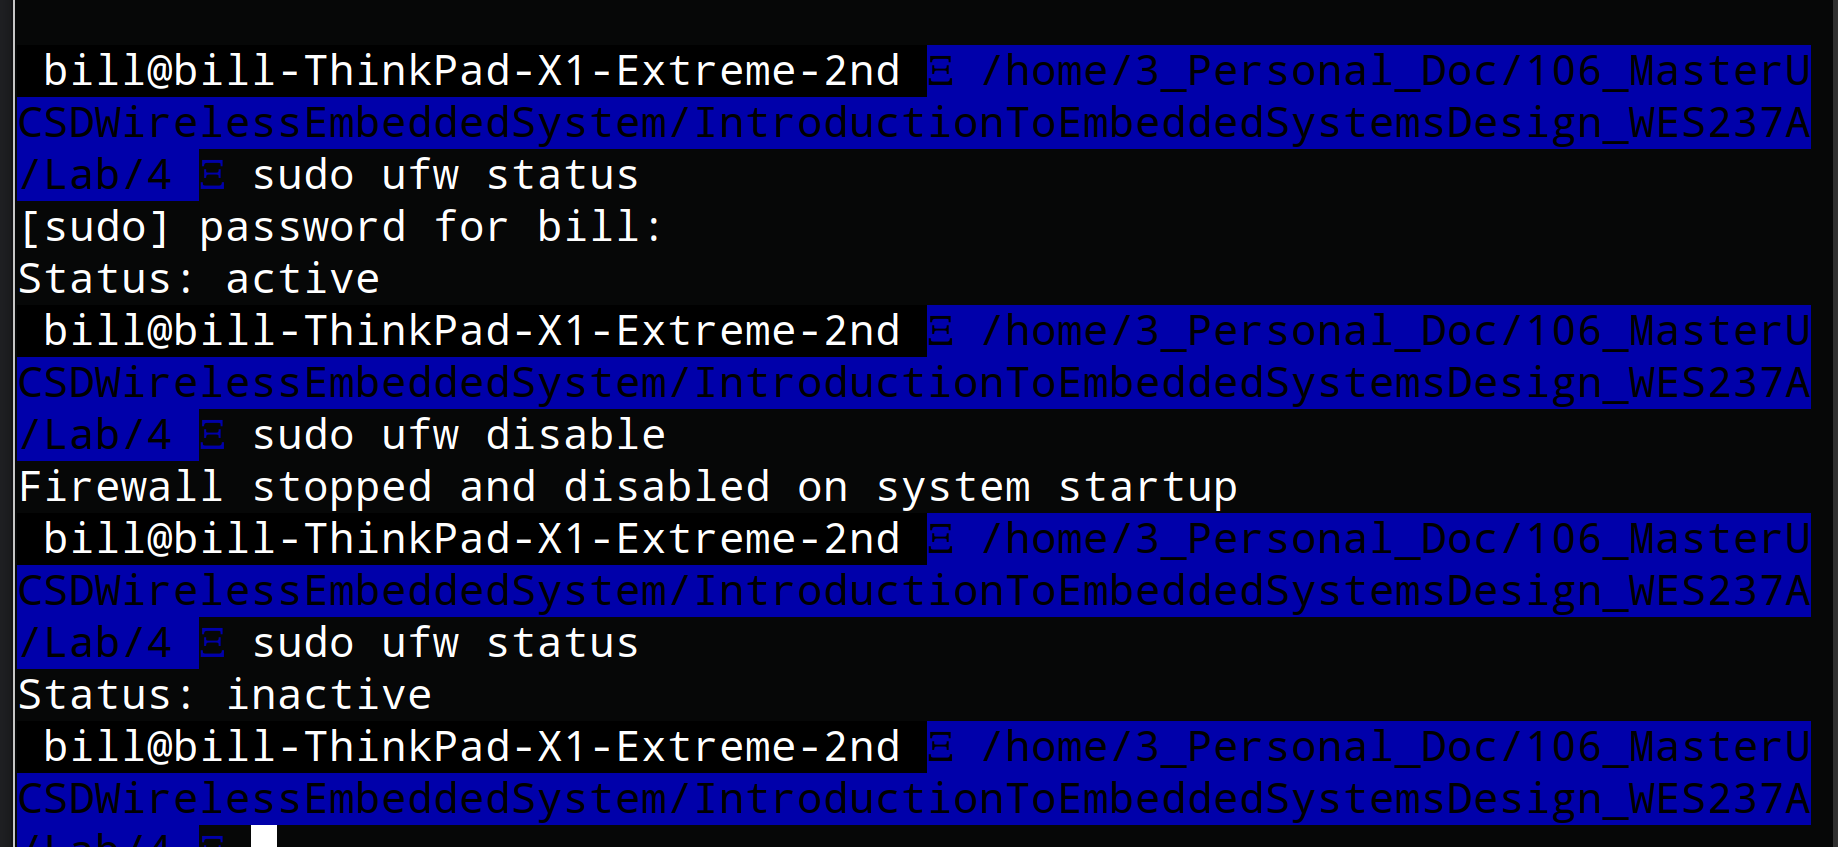

On your server, you should see the message and then the server will shutdown! When we close a socket, both the client and the server are disconnected from the port.

# Instead, change the function above to send 5 messages before closing.

The pseudocode looks like this

* connect the socket
* for i in range(5)
    * msg = input("Message to send: ")
    * send the message (msg)
* close the socket

In [4]:
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
 
# 1: Connect the socket (sock) to the <SERVER-IP> and choosen port <LISTENING-PORT>
sock.connect(('192.168.2.1', 1234))
# 2: Send 5 messages
for i in range(5):
    msg = input("Message to send: ")
    bMsg = (msg).encode('ASCII')
#    print(msg.encode('ASCII'))
    sock.send(bMsg)
# 3: Close the socket
sock.close()

Message to send: UCSD
Message to send: Wireless
Message to send: Embedded
Message to send: System
Message to send: Lab 4


<font color='blue'>$\textbf{Here, the PYNQ work as the client, the laptop work as a server using a python code}$</font>
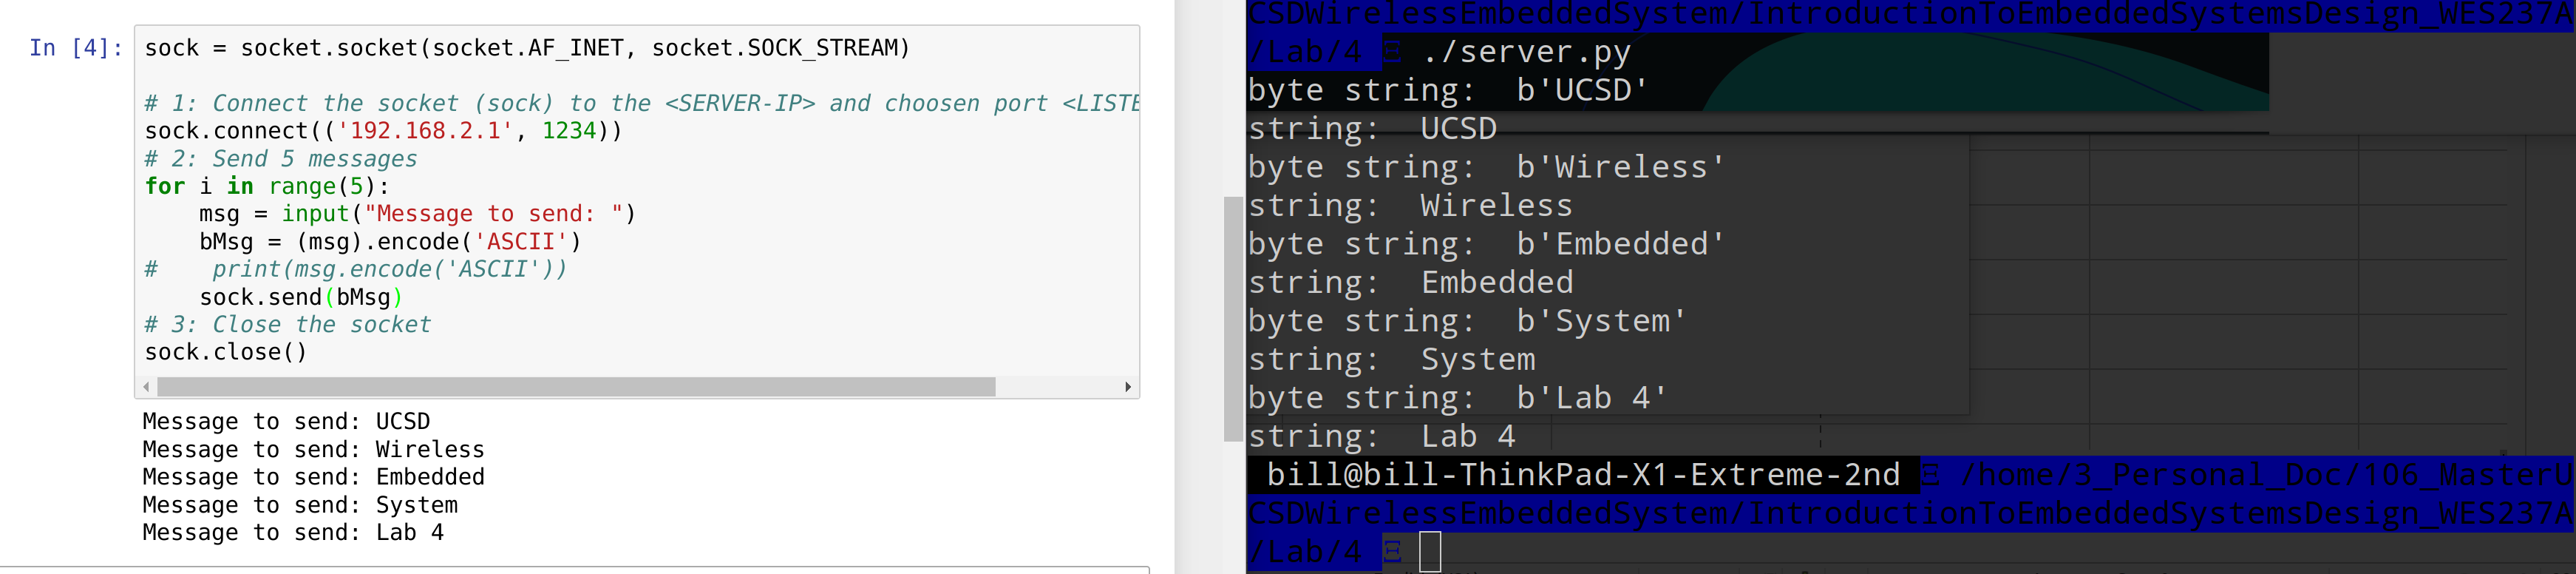

<font color='blue'>$\textbf{Here, the PYNQ work as the client, the laptop work as a server using nc}$</font>
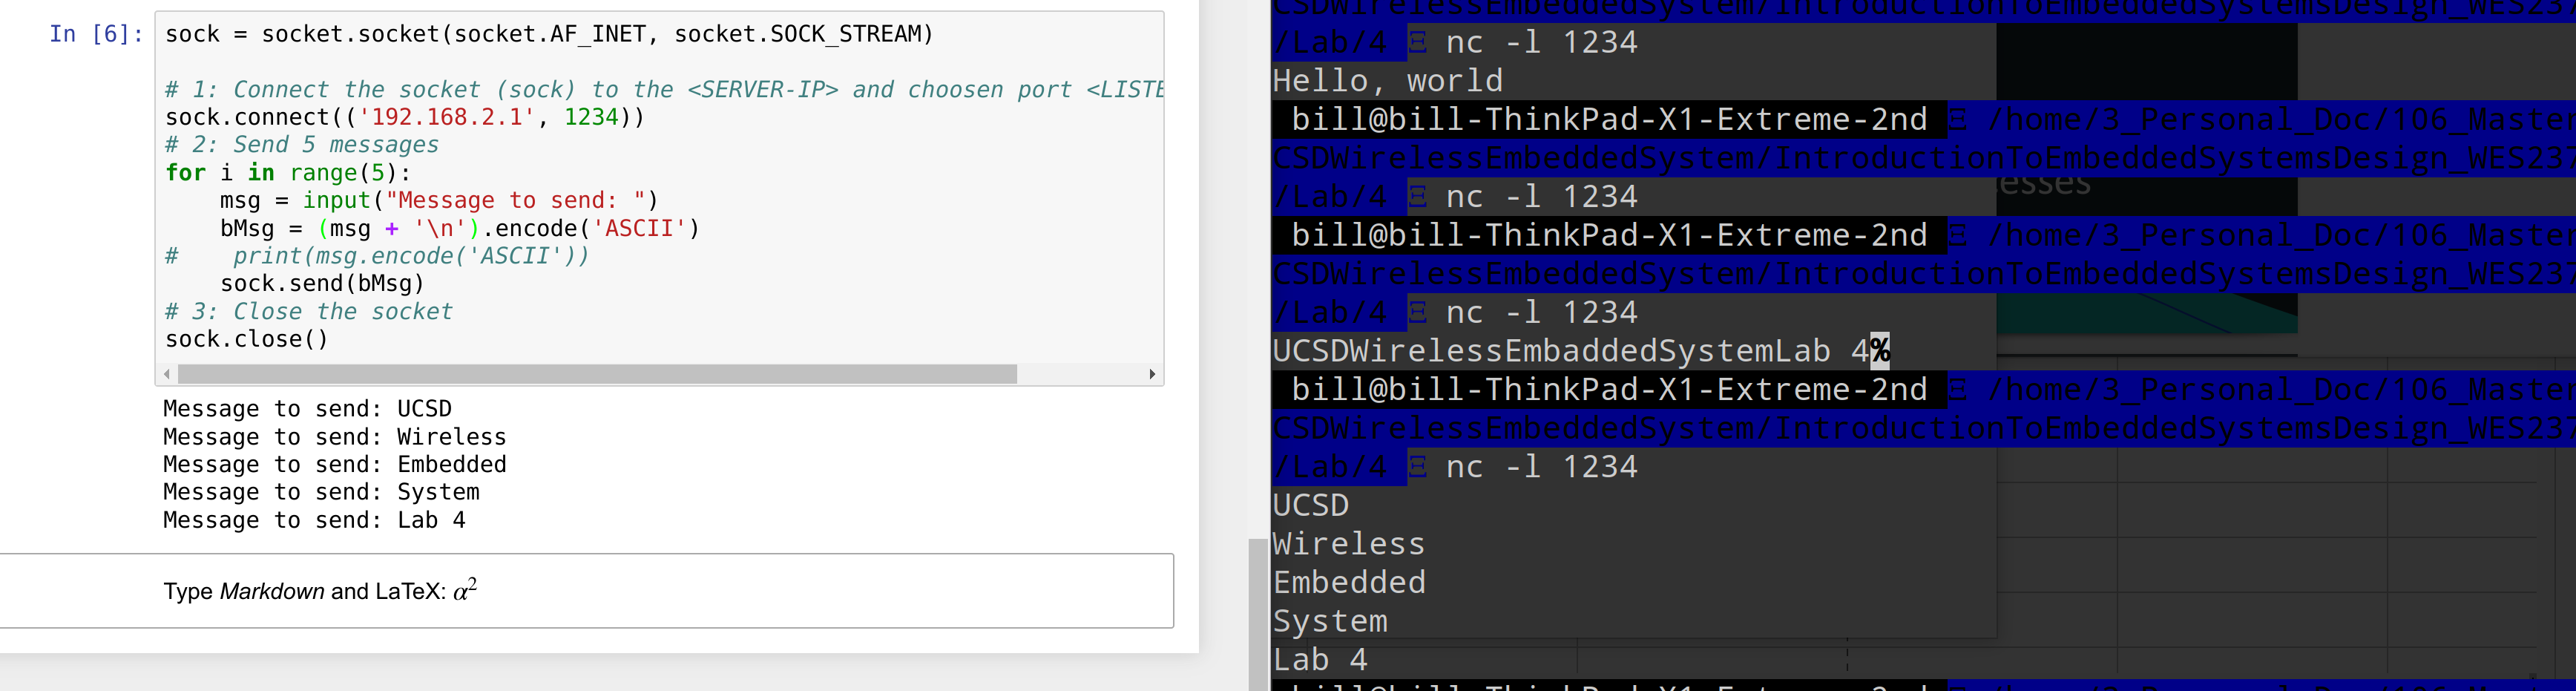